# Classifying IMDB Reviews with LSTMs

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
(25000, 'train sequences')
(25000, 'test sequences')
Pad sequences (samples x time)
('input_train shape:', (25000, 500))
('input_test shape:', (25000, 500))


In [8]:
from keras.layers import LSTM, Embedding, Dense, Dropout
from keras import models

model = models.Sequential()
model.add(Embedding(max_features, 32))
model.add(Dropout(0.4))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train, 
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 388s - loss: 0.5562 - acc: 0.7305 - val_loss: 0.5002 - val_acc: 0.7704
Epoch 2/10
20000/20000 [==============================] - 335s - loss: 0.3285 - acc: 0.8691 - val_loss: 0.2955 - val_acc: 0.8764
Epoch 3/10
20000/20000 [==============================] - 323s - loss: 0.2584 - acc: 0.8989 - val_loss: 0.3066 - val_acc: 0.8728
Epoch 4/10
20000/20000 [==============================] - 333s - loss: 0.2284 - acc: 0.9141 - val_loss: 0.2865 - val_acc: 0.8904
Epoch 5/10
20000/20000 [==============================] - 340s - loss: 0.1987 - acc: 0.9285 - val_loss: 0.2835 - val_acc: 0.8854
Epoch 6/10
20000/20000 [==============================] - 351s - loss: 0.1862 - acc: 0.9327 - val_loss: 0.3208 - val_acc: 0.8900
Epoch 7/10
20000/20000 [==============================] - 336s - loss: 0.1702 - acc: 0.9381 - val_loss: 0.3294 - val_acc: 0.8604
Epoch 8/10
20000/20000 [========================

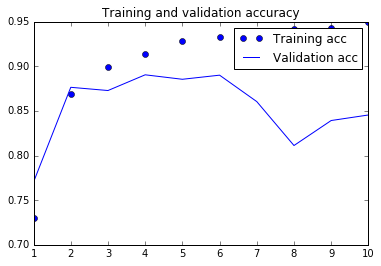

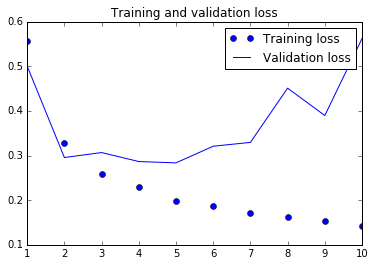

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()